In [1]:
import os
if(os.path.split(os.getcwd())[1] == "misc"):
    os.chdir("..")
print("Current Working Directory: {}".format(os.path.split(os.getcwd())[1]))

Current Working Directory: progettoVIPM


In [15]:
import pandas as pd

df = pd.read_csv('misc/model_metrics/metrics.csv')

In [16]:
df.rename(columns={'Unnamed: 0': 'Model'}, inplace=True)

In [17]:
df.head(20)

,Model,accuracy_validation,top5_accuracy_validation,accuracy_test,top5_accuracy_test,accuracy_validation_degraded,top5_accuracy_validation_degraded,accuracy_test_degraded,top5_accuracy_test_degraded
0,Classify To Learn ResNet50,0.298805,1.693227,NaN,NaN,NaN,NaN,NaN,NaN
1,Colorizer + Labels Clustering,0.398406,2.490040,NaN,NaN,NaN,NaN,NaN,NaN
2,Colorizer + Data Augmentation,0.498008,2.788845,NaN,NaN,NaN,NaN,NaN,NaN
3,Sparse Autoencoder,0.796813,2.091633,NaN,NaN,NaN,NaN,NaN,NaN
4,Colorizer,1.095618,3.386454,NaN,NaN,NaN,NaN,NaN,NaN
5,Baseline,1.593625,6.175299,NaN,NaN,NaN,NaN,NaN,NaN
6,Pretrained ResNet50 (ImageNet1k) Augmented Tra...,22.808765,46.314741,NaN,NaN,16.235060,35.557769,NaN,NaN
7,Pretrained ResNet50 (ImageNet1k),25.398406,49.402390,29.873270,55.611139,NaN,NaN,18.325830,36.876772
8,Pretrained ResNet50 (ImageNet1k) Augmented Tra...,26.195219,52.788845,NaN,NaN,18.924303,36.055777,NaN,NaN
9,Pretrained ResNet50 (FOOD101) Augmented Traini...,28.286853,51.792829,NaN,NaN,23.107570,45.418327,NaN,NaN


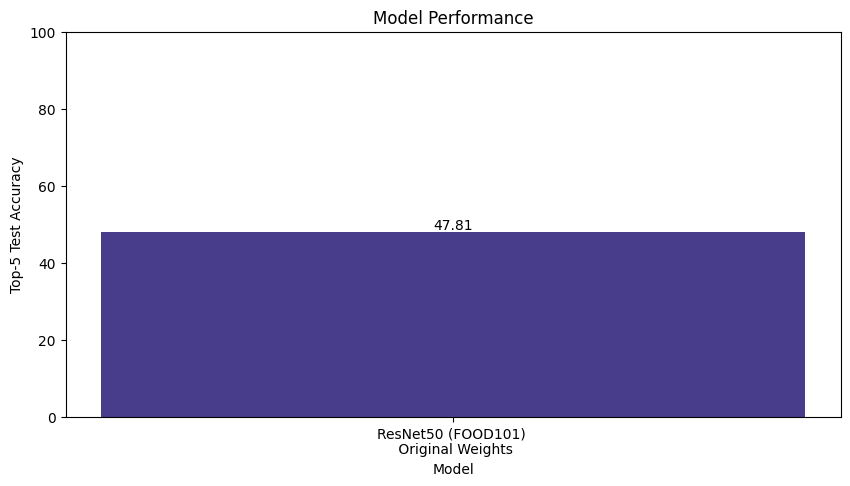

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


temp_df = df.copy()
models = ["Pretrained ResNet50 (FOOD101) Augmented Training Original Weights"]
temp_df = temp_df[temp_df['Model'].isin(models)]
temp_df["Model"] = temp_df["Model"].replace({"Pretrained ResNet50 (ImageNet1k) Augmented Training Pytorch Weights": "ResNet50 (ImageNet1k) \n Original Weights", "Pretrained ResNet50 (ImageNet1k) Augmented Training Trained Weights": "ResNet50 (ImageNet1k) \n Trained Weights", "Pretrained ResNet50 (FOOD101) Augmented Training Original Weights": "ResNet50 (FOOD101) \n Original Weights", "Pretrained ResNet50 (FOOD101) Augmented Training Trained Weights": "ResNet50 (FOOD101) \n Trained Weights"})
# Create bar plot
plt.figure(figsize=(10, 5))
bars = plt.bar(temp_df['Model'], temp_df['top5_accuracy_validation_degraded'], color='darkslateblue')

# Add numeric values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Top-5 Test Accuracy')
plt.title('Model Performance')
plt.ylim(0, 100)  # Adjust if necessary

# Show plot
plt.show()

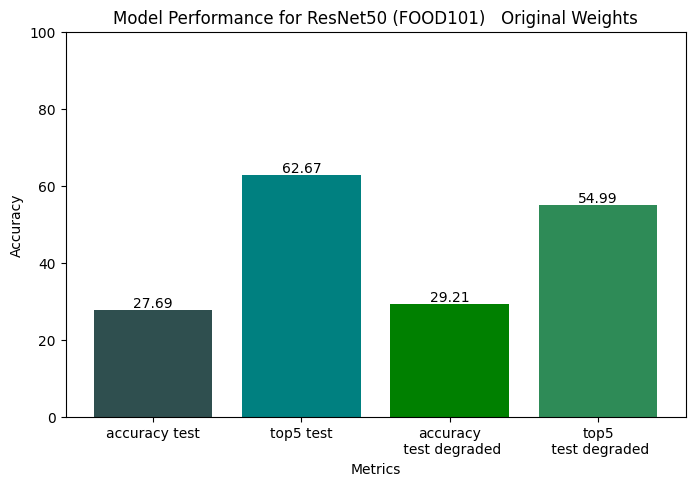

In [55]:
import matplotlib.pyplot as plt

temp_df = df.copy()
models = ["Pretrained ResNet50 (FOOD101) Augmented Training Original Weights"]
temp_df = temp_df[temp_df['Model'].isin(models)]
temp_df["Model"] = temp_df["Model"].replace({"Pretrained ResNet50 (ImageNet1k) Augmented Training Pytorch Weights": "ResNet50 (ImageNet1k) \n Original Weights", "Pretrained ResNet50 (ImageNet1k) Augmented Training Trained Weights": "ResNet50 (ImageNet1k) \n Trained Weights", "Pretrained ResNet50 (FOOD101) Augmented Training Original Weights": "ResNet50 (FOOD101) \n Original Weights", "Pretrained ResNet50 (FOOD101) Augmented Training Trained Weights": "ResNet50 (FOOD101) \n Trained Weights"})

# Define the model name you want to plot
model_name = "ResNet50 (FOOD101) \n Original Weights"  # Change this to the model you want to plot

# Filter the DataFrame to get the row corresponding to the selected model
model_data = temp_df[temp_df['Model'] == model_name]

# Extract column names and values for plotting
metrics = ["accuracy_test", "top5_accuracy_test", "accuracy_test_degraded", "top5_accuracy_test_degraded"]
values = model_data[metrics].values.flatten()  # Convert DataFrame row to a list
metrics = ["accuracy test", "top5 test", "accuracy\n test degraded", "top5\n test degraded"]
# Plot the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['darkslategray', 'teal', 'green', 'seagreen'])

# Add numeric values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
model_name = model_name.replace("\n", " ")
plt.title(f'Model Performance for {model_name}')
plt.ylim(0, 100)  # Adjust the range if necessary

# Show plot
plt.show()